### Import libraries and data
### Line Chart
### Decomposition
### Stationarity (Dickey-Fuller) test
### Autocorrelation Test
### Differencing

### Import libraries and data

In [1]:
# import libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight') 

In [2]:
# import data 
path = r'C:\Users\darii\Documents\12-2023 Airbnb Analysis'
data=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_clean.pkl'))

In [3]:
# check data types
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
# converting last_review to datetime
data['last_review'] = pd.to_datetime(data['last_review'])

In [5]:
# check
data.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

### Line chart

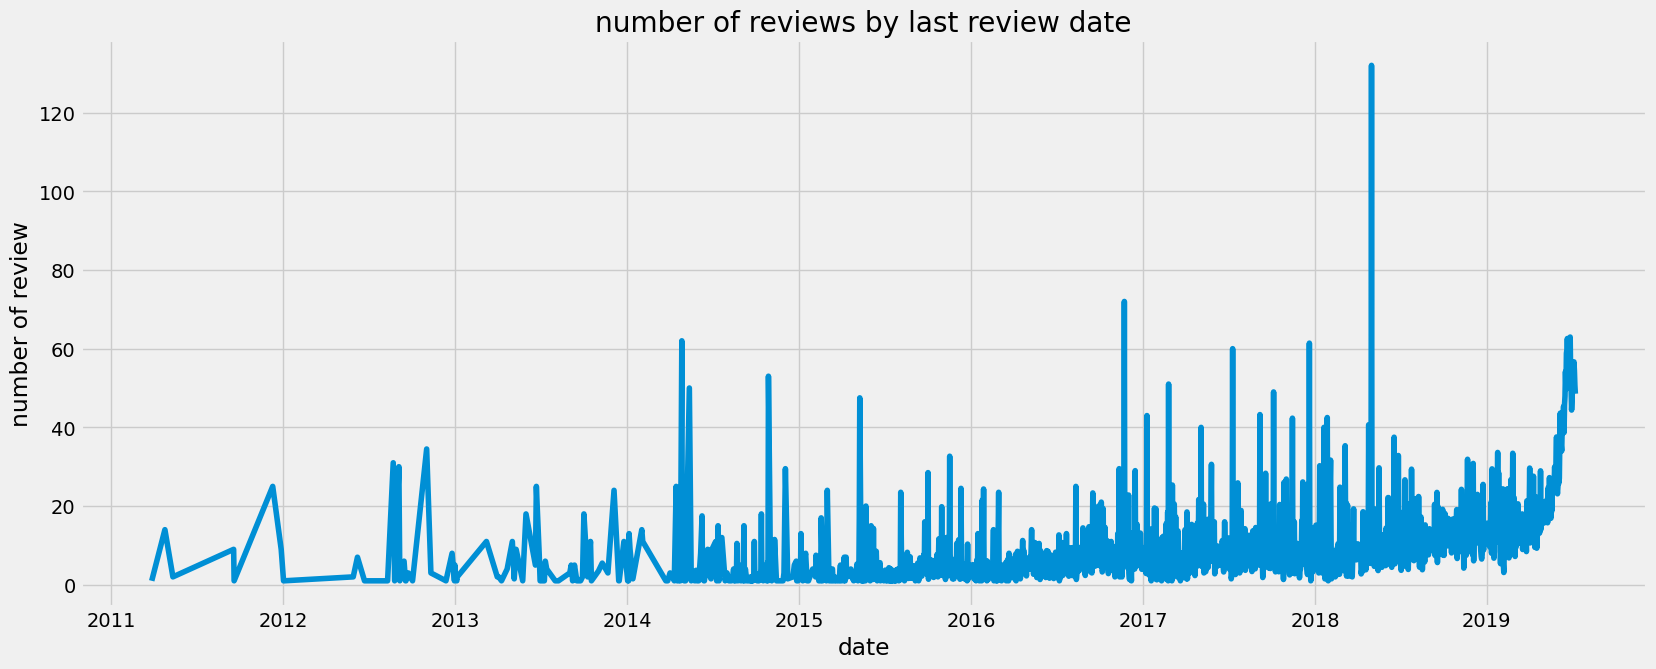

In [7]:
df = data.groupby('last_review').agg({'number_of_reviews':['mean']})

plt.figure(figsize=(18,7), dpi=100) 
plt.title('number of reviews by last review date')
plt.xlabel('date')
plt.ylabel('number of review')
plt.plot(df)

In [8]:
# check for missing values 

df.isnull().sum() 

number_of_reviews  mean    0
dtype: int64

In [9]:
# check for duplicates

dups = df.duplicated()
dups.sum()

962

In [10]:
df.drop_duplicates()

,number_of_reviews
,mean
last_review,
2011-03-28,1.000000
2011-04-25,14.000000
2011-05-12,2.000000
2011-09-18,9.000000
2011-12-10,25.000000
...,...
2019-07-04,55.551515
2019-07-05,56.648276


### Decomposition

In [11]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=4)

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

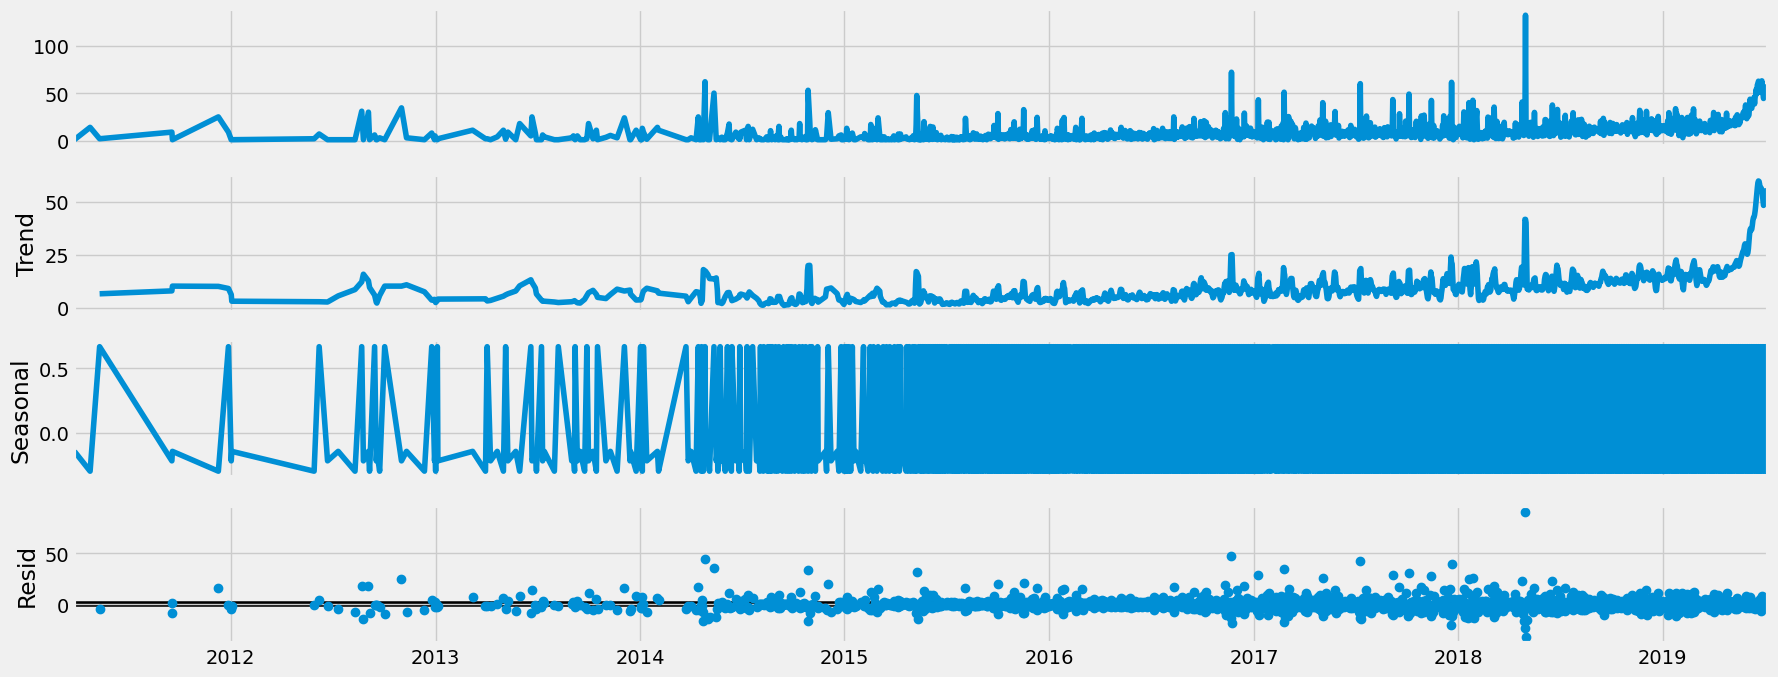

In [14]:
decomposition.plot()
plt.show()

##### the level and the trend look very similar --> no trend
##### data has seasonality 
##### data has a lot of noise

### Stationarity (Dickey-Fuller) test

In [16]:
# import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# define the function
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# apply the test using the function on the time series
dickey_fuller(df['number_of_reviews'])

Dickey-Fuller Stationarity test:
Test Statistic                    1.454344
p-value                           0.997348
Number of Lags Used              22.000000
Number of Observations Used    1741.000000
Critical Value (1%)              -3.434112
Critical Value (5%)              -2.863202
Critical Value (10%)             -2.567655
dtype: float64


##### p-value = 0.997348 > 0.05 & Test Statistic (1.45...) > critical values --> null hypothesis can't be rejected --> the data is not stationary

### Autocorrelation test

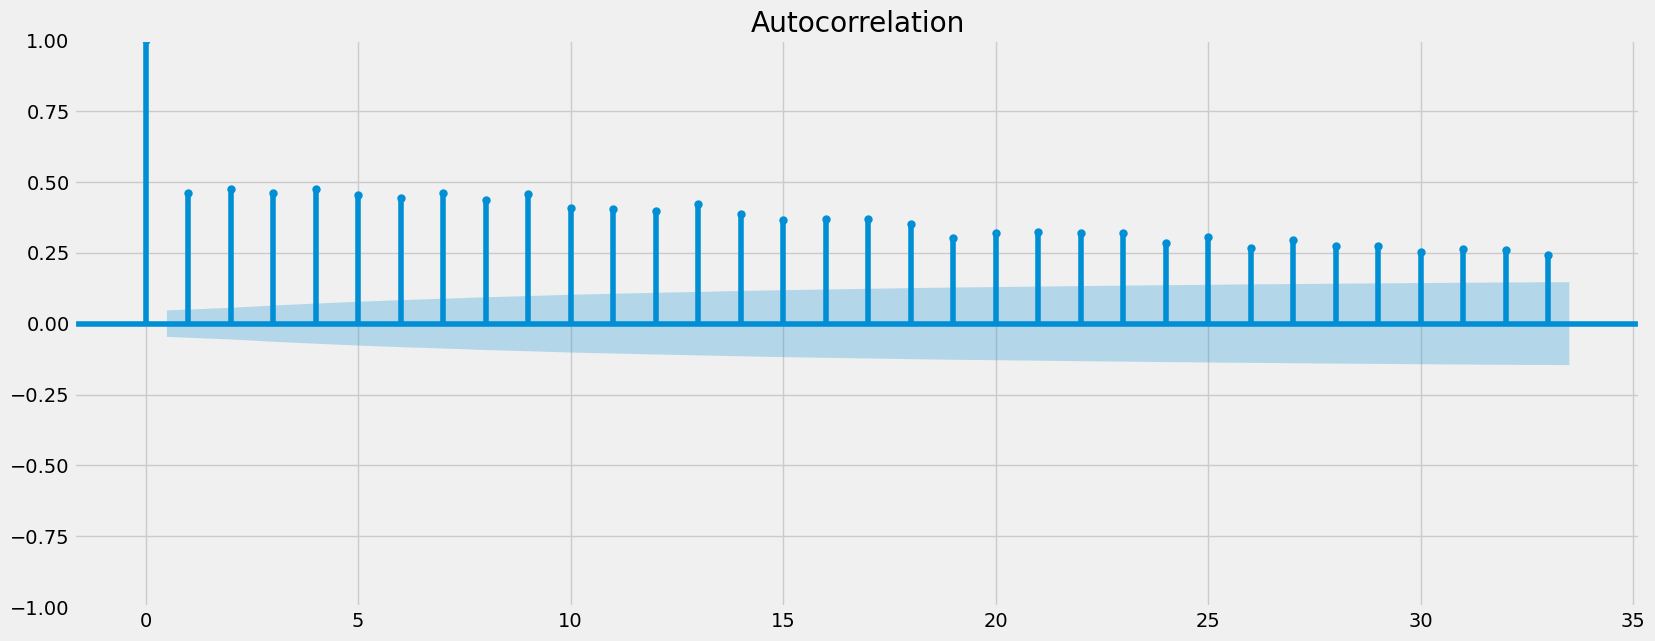

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df)
plt.show()

##### all legs are above the confidence interval --> significant autocorrelation

### Differencing

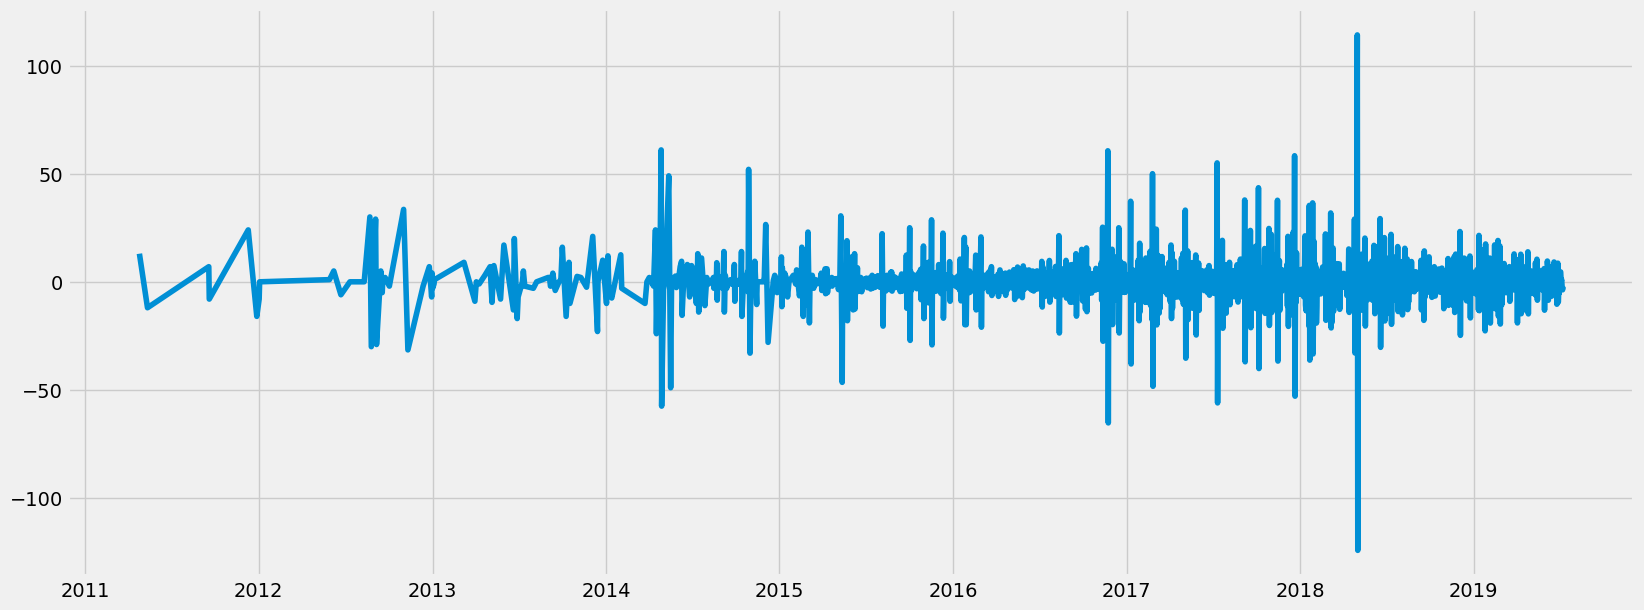

In [18]:
df_diff = df - df.shift(1)
df_diff.dropna(inplace = True)
plt.figure(figsize=(18,7), dpi=100)
plt.plot(df_diff)

In [19]:
# test
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.298197e+01
p-value                        2.930956e-24
Number of Lags Used            2.100000e+01
Number of Observations Used    1.741000e+03
Critical Value (1%)           -3.434112e+00
Critical Value (5%)           -2.863202e+00
Critical Value (10%)          -2.567655e+00
dtype: float64


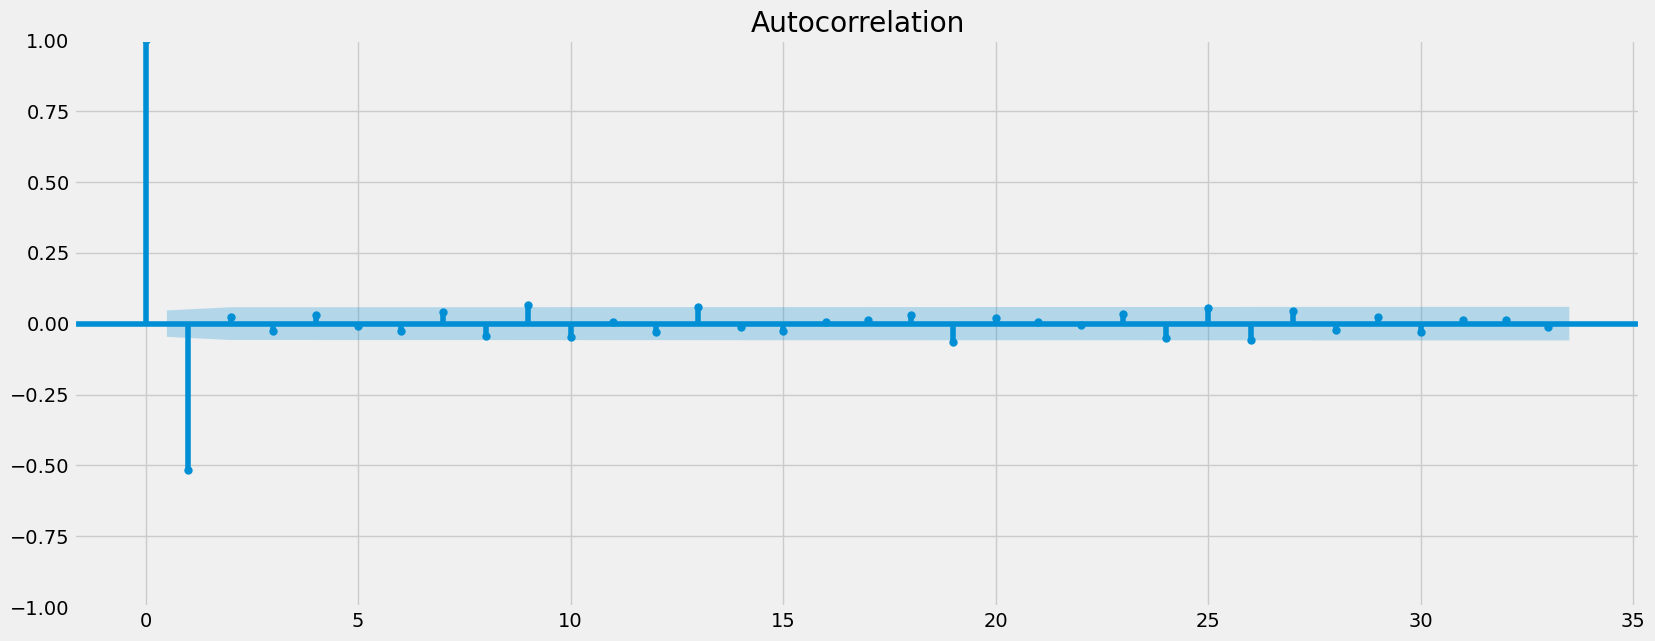

In [21]:
# autocorrelation test
plot_acf(df_diff)
plt.show()

##### p-value < 0.05 & Test Statistic < critical values --> null hypothesis can be rejected --> the data is  stationary